In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv("customerdataset2.csv")
df.head()

,CustomerID,Customer Name,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Rahul Patel,Male,56,59,30
1,2,Deepak Yadav,Male,69,79,62
2,3,Nikhil Malhotra,Male,46,103,75
3,4,Rohan Ansari,Male,32,85,92
4,5,Krishna Ali,Male,60,23,89


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CustomerID              100000 non-null  int64 
 1   Customer Name           100000 non-null  object
 2   Gender                  100000 non-null  object
 3   Age                     100000 non-null  int64 
 4   Annual Income (k$)      100000 non-null  int64 
 5   Spending Score (1-100)  100000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.6+ MB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.500000,43.350000,74.830000,52.630000
std,28.866214,14.830027,37.420784,30.321647
min,1.000000,19.000000,15.000000,1.000000
25%,25.750000,31.750000,42.750000,27.000000
50%,50.500000,42.000000,76.000000,56.000000
75%,75.250000,57.000000,108.500000,77.500000
max,100.000000,69.000000,139.000000,99.000000


In [11]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,59,30
1,79,62
2,103,75
3,85,92
4,23,89


In [22]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

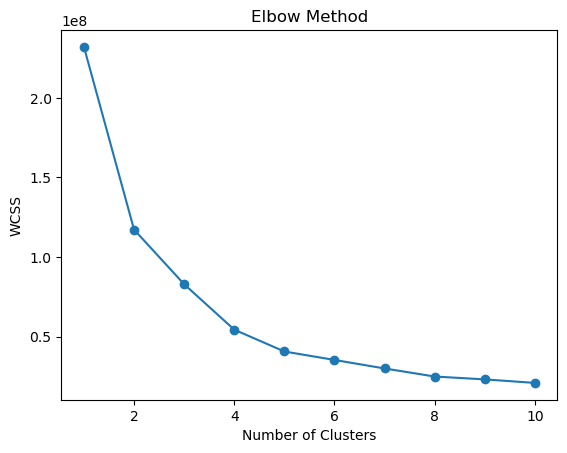

In [15]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans
df.head()

,CustomerID,Customer Name,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Rahul Patel,Male,56,59,30,3
1,2,Deepak Yadav,Male,69,79,62,1
2,3,Nikhil Malhotra,Male,46,103,75,0
3,4,Rohan Ansari,Male,32,85,92,1
4,5,Krishna Ali,Male,60,23,89,2


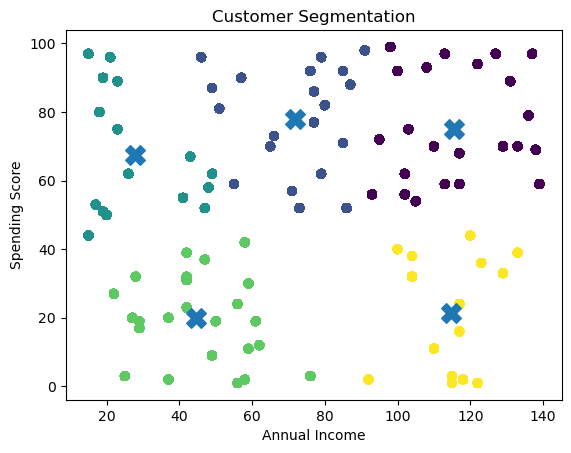

In [19]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, marker='X')

plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [20]:
df.to_csv("Final_Customer_Segmentation.csv", index=False)
print("File saved successfully")

File saved successfully
